# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.976554e+01     7.045069e+00
 * time: 0.0043718814849853516
     1     2.818021e+01     5.084107e+00
 * time: 0.11252093315124512
     2     1.913752e+01     4.417052e+00
 * time: 0.13013291358947754
     3     1.279446e+01     2.985026e+00
 * time: 0.1472330093383789
     4     1.156018e+01     2.261579e+00
 * time: 0.16100287437438965
     5     1.051189e+01     1.678262e+00
 * time: 0.17515897750854492
     6     9.686020e+00     1.359558e+00
 * time: 0.18934392929077148
     7     8.987741e+00     1.010360e+00
 * time: 0.2033538818359375
     8     8.497704e+00     7.086414e-01
 * time: 0.21736383438110352
     9     8.314375e+00     4.993206e-01
 * time: 0.23141098022460938
    10     8.269045e+00     7.678299e-01
 * time: 0.24175286293029785
    11     8.250166e+00     6.627235e-01
 * time: 0.25251197814941406
    12     8.198736e+00     4.928646e-01
 * time: 0.26341891288757324
    13     8.118699e+00     4.658125e-01
 * time:

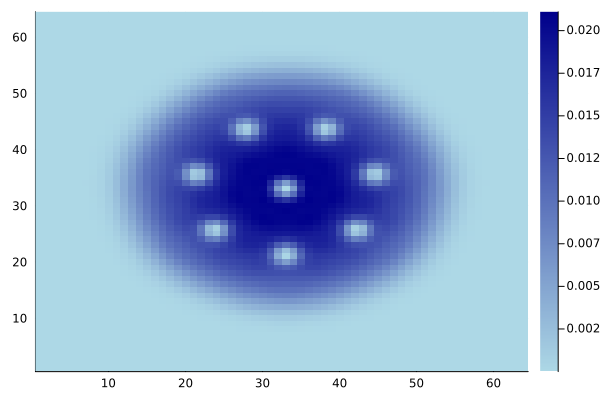

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)